In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import scipy
import os
from os.path import join
import pandas as pd

CURRENT_DIR = os.getcwd()
print(CURRENT_DIR)

import warnings
warnings.filterwarnings("ignore")

c:\Users\aless\OneDrive\Desktop\Internship_results


## Script to obtain the results of the fitted gradient boosting models

### Plot performance of different models

Pearson r

In [2]:
models = ["bs_esm2", "bs_ChemBERTa2", "bs_esm2_ChemBERTa2"] 
model_names = {"bs_esm2": "ESM-2",
               "bs_ChemBERTa2": "ChemBERTa-2",
               "bs_esm2_ChemBERTa2": "ESM-2 + \n ChemBERTa-2"}

*Xgboost is trained in HPC and results are copied inside the training_results directory*

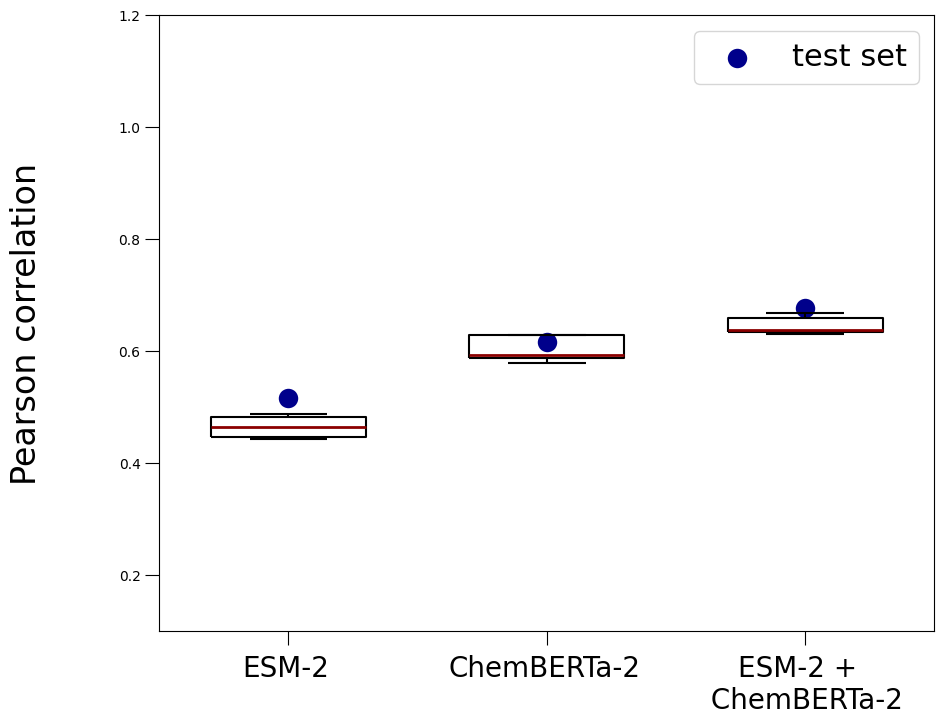

In [3]:

fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({"font.size": 22})
plt.ylim(0.1, 1.2)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []

for i, model in enumerate(models):
    Pearson_CV = np.load(join("training_results", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("training_results", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("training_results", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("training_results", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results", "y_test_true_xgboost_" + model + ".npy"))
    Pearson_test = stats.pearsonr(test_y, pred_y)[0]
    
    if i == 0:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, Pearson_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(Pearson_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})



ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis="x", which="major", length=10)
ax.tick_params(axis="y", length=10)


ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 20)
ax.tick_params(axis='x', which="minor",length=0)


plt.ylabel("Pearson correlation", fontsize= 24)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.legend(loc = "upper right")
plt.savefig(join("figures", "boxplots_pearson_r.png"))
plt.show()


In [4]:
import os
import numpy as np
import pandas as pd
from scipy.stats import wilcoxon

model_pearson = {}

for model in models:
    path = os.path.join("training_results", f"Pearson_CV_xgboost_{model}.csv")
    data = pd.read_csv(path, header=0)  
    scores = data.iloc[:, 0].values
    model_pearson[model] = scores
model_pearson

{'bs_esm2': array([0.4652734 , 0.44401539, 0.44705626, 0.48837922, 0.48303823]),
 'bs_ChemBERTa2': array([0.59443916, 0.62955679, 0.57953281, 0.62958579, 0.58771795]),
 'bs_esm2_ChemBERTa2': array([0.63481564, 0.65952428, 0.6374943 , 0.66857305, 0.63072903])}

Mean Squared Error

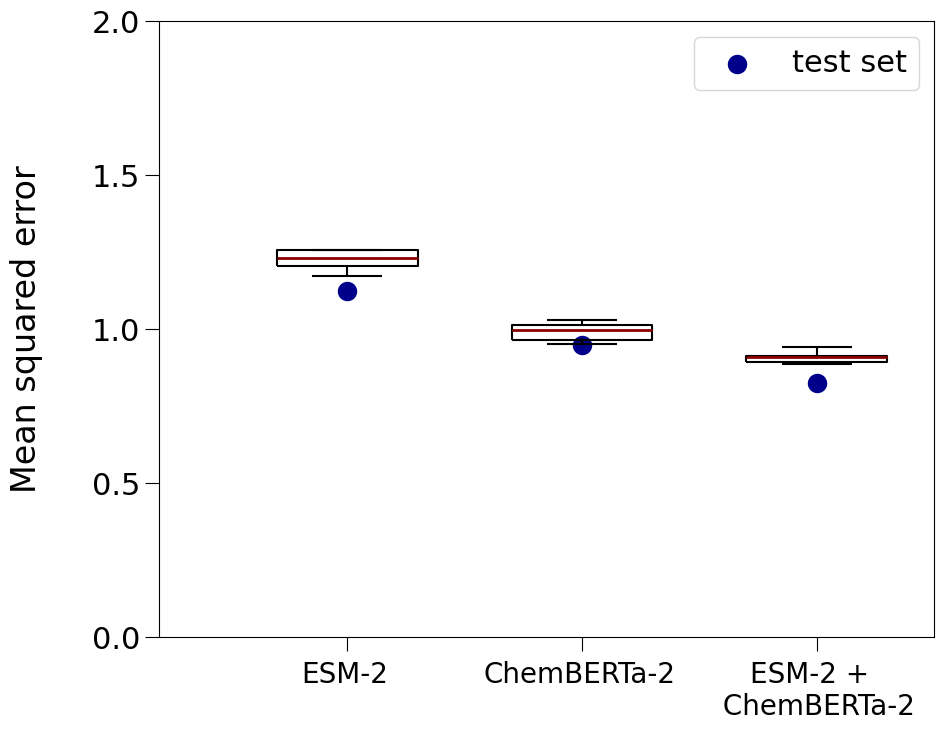

In [5]:
fig, ax = plt.subplots(figsize= (10,8))
plt.rcParams.update({"font.size": 22})
plt.ylim(0.0, 2.0)
plt.xlim(0.2, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []
for i, model in enumerate(models):
    Pearson_CV = np.load(join( "training_results", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join( "training_results", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join( "training_results", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join( "training_results", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results", "y_test_true_xgboost_" + model + ".npy"))
    MSE_test = np.mean(abs(test_y -  pred_y)**2)

    
    if i == 0:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8, label = "test set")
    else:
        plt.scatter(i+1, MSE_test, c='darkblue', marker="o", linewidths= 8)
        
    Boxplots.append(MSE_CV)
    ticks.append(i+1)

        
plt.boxplot(Boxplots, positions=ticks,  widths=0.6,
           medianprops={"linewidth": 2,"solid_capstyle": "butt", "c" : "darkred"},
            boxprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops= {"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops= {"linewidth": 1.5, "solid_capstyle": "butt"})


ax.locator_params(axis="y", nbins=4)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])
ax.tick_params(axis='x', which="major", length=10)
ax.tick_params(axis='y', length=10)

ticks2 = list(np.array(ticks)-0.01)

ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y= -0.03, fontsize = 20)
ax.tick_params(axis="x", which="minor",length=0)

plt.ylabel("Mean squared error", fontsize=24)
ax.yaxis.set_label_coords(-0.15, 0.5)
plt.legend(loc = "upper right")
plt.savefig(join("figures", "boxplots_mse.png"))
plt.show()

In [6]:
model_mse_cv = {}

for model in models:
    path = os.path.join("training_results", f"MSE_CV_xgboost_{model}.csv")
    data = pd.read_csv(path, header=0)  
    scores = data.iloc[:, 0].values
    model_mse_cv[model] = scores
model_mse_cv

{'bs_esm2': array([1.17232144, 1.25886831, 1.23159377, 1.25849388, 1.2063139 ]),
 'bs_ChemBERTa2': array([0.96551203, 0.95304624, 1.01570195, 0.99788169, 1.03024086]),
 'bs_esm2_ChemBERTa2': array([0.89295264, 0.8877265 , 0.90979061, 0.91367666, 0.94371178])}

Coefficients of determination

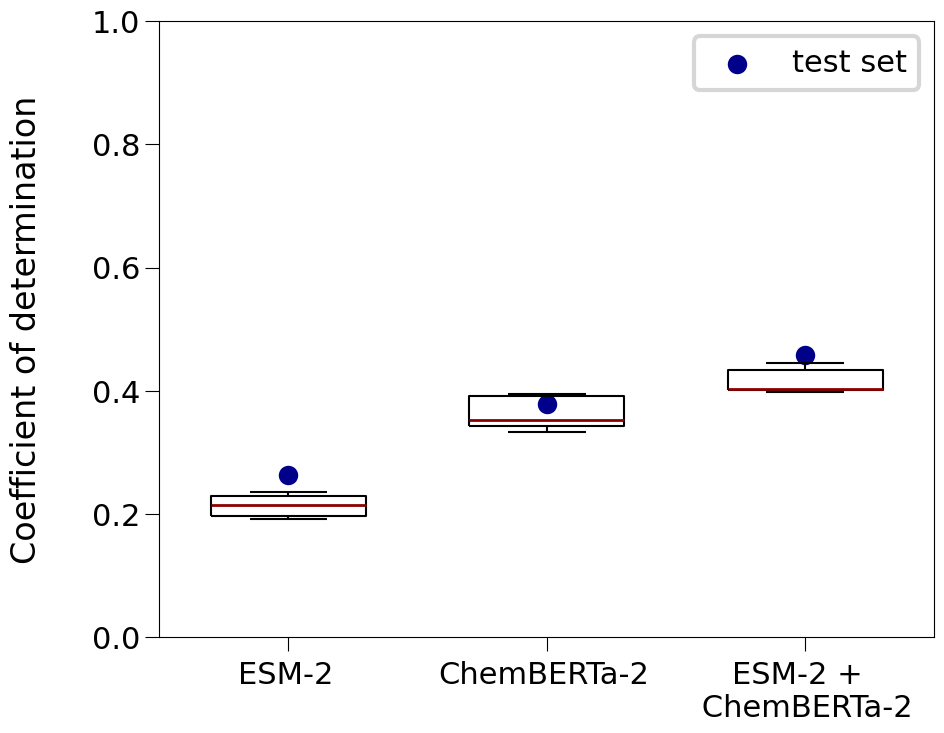

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
plt.rcParams.update({"font.size": 22})
plt.ylim(0, 1)
plt.xlim(0.5, len(models) + 0.5)

labs = [model_names[model] for model in models]
Boxplots = []
ticks = []

for i, model in enumerate(models):
    Pearson_CV = np.load(join("training_results", "Pearson_CV_xgboost_" + model + ".npy"))
    MSE_CV = np.load(join("training_results", "MSE_CV_xgboost_" + model + ".npy"))
    R2_CV = np.load(join("training_results", "R2_CV_xgboost_" + model + ".npy"))
    pred_y = np.load(join("training_results", "y_test_pred_xgboost_" + model + ".npy"))
    test_y = np.load(join("training_results", "y_test_true_xgboost_" + model + ".npy"))
    R2_test = r2_score(test_y, pred_y)

    if i == 0:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths=8, label="test set")
    else:
        plt.scatter(i+1, R2_test, c='darkblue', marker="o", linewidths=8)

    Boxplots.append(R2_CV)
    ticks.append(i+1)

plt.boxplot(Boxplots, positions=ticks, widths=0.6,
           medianprops={"linewidth": 2, "solid_capstyle": "butt", "c": "darkred"},
           boxprops={"linewidth": 1.5, "solid_capstyle": "butt"},
           whiskerprops={"linewidth": 1.5, "solid_capstyle": "butt"},
           capprops={"linewidth": 1.5, "solid_capstyle": "butt"})

ax.locator_params(axis="y", nbins=8)

ticks1 = ticks
ax.set_xticks(ticks1)
ax.set_xticklabels([])  
ax.tick_params(axis="x", which="major", length=10)
ax.tick_params(axis="y", length=10)


ticks2 = list(np.array(ticks) - 0.01)


ax.set_xticks(ticks2, minor=True)
ax.set_xticklabels(labs, minor=True, y=-0.03, fontsize= 22)  
ax.tick_params(axis="x", which="minor", length=0)
ax.locator_params(axis="y", nbins=5)

plt.ylabel("Coefficient of determination", fontsize =24)
ax.yaxis.set_label_coords(-0.15, 0.5)

leg = plt.legend(loc = "upper right")
leg.get_frame().set_linewidth(3.0)
plt.savefig(join("figures", "boxplots_R2.png"))
plt.show()

In [8]:
model_r2_cv = {}

for model in models:
    path = os.path.join("training_results", f"R2_CV_xgboost_{model}.csv")
    data = pd.read_csv(path, header=0)  
    scores = data.iloc[:, 0].values
    model_r2_cv[model] = scores
model_r2_cv

{'bs_esm2': array([0.21445524, 0.19709616, 0.19162978, 0.23643448, 0.2299683 ]),
 'bs_ChemBERTa2': array([0.35303331, 0.3921489 , 0.33333277, 0.39455562, 0.34236179]),
 'bs_esm2_ChemBERTa2': array([0.40165363, 0.43380971, 0.40284885, 0.44564531, 0.39759628])}

In [9]:
df_metrics = pd.DataFrame()

for model in model_r2_cv.keys():
    for i in range(5):  
        df_metrics = pd.concat([df_metrics, pd.DataFrame({
            'Model': [model],
            'Fold': [i + 1],
            'R2': [model_r2_cv[model][i]],
            'MSE': [model_mse_cv[model][i]],
            'Pearson': [model_pearson[model][i]]
        })], ignore_index=True)

df_metrics.to_csv("df_metrics.csv")
df_metrics

,Model,Fold,R2,MSE,Pearson
0,bs_esm2,1,0.214455,1.172321,0.465273
1,bs_esm2,2,0.197096,1.258868,0.444015
2,bs_esm2,3,0.191630,1.231594,0.447056
3,bs_esm2,4,0.236434,1.258494,0.488379
4,bs_esm2,5,0.229968,1.206314,0.483038
5,bs_ChemBERTa2,1,0.353033,0.965512,0.594439
6,bs_ChemBERTa2,2,0.392149,0.953046,0.629557
7,bs_ChemBERTa2,3,0.333333,1.015702,0.579533
8,bs_ChemBERTa2,4,0.394556,0.997882,0.629586
9,bs_ChemBERTa2,5,0.342362,1.030241,0.587718


### Plotting predictions versus experimental values

Loading predictions for the best model (brenda_sabio)

In [10]:
model = "bs_esm2_ChemBERTa2"

pred_y = np.load(join("training_results", "y_test_pred_xgboost_" + model + ".npy"))
test_y = np.load(join("training_results", "y_test_true_xgboost_" + model + ".npy"))

data_test = pd.read_pickle(join("partitions_brenda_sabio","test_df.pkl"))

data_test["n_values"] = data_test["log_km"].apply(lambda x: len(x) if isinstance(x, (list, np.ndarray)) else [x])
n_values = np.array(data_test["n_values"])

In [11]:
np.mean(abs(pred_y-test_y)), 10**np.mean(abs(pred_y-test_y))

(np.float64(0.703961241554228), np.float64(5.057795218879251))

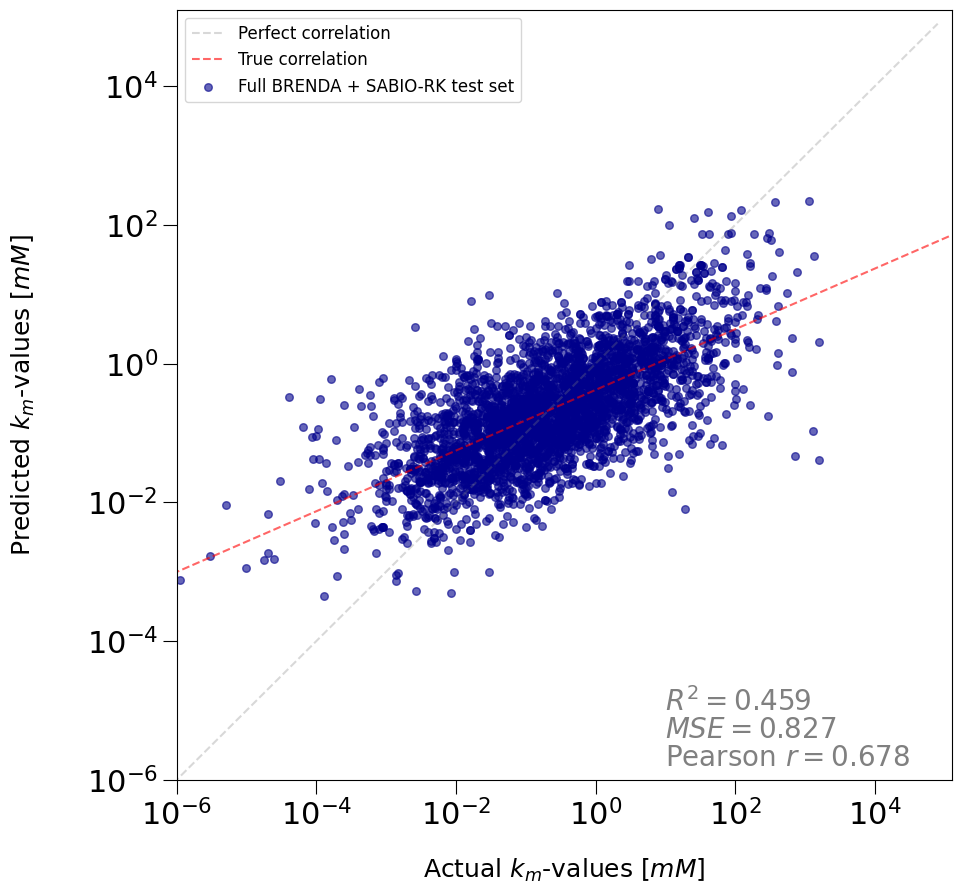

In [12]:
fig, ax = plt.subplots(figsize= (10,10))
plt.rcParams.update({"font.size": 16})


plt.ylim(ymax = 5.1, ymin = -3.5)
plt.xlim(xmax = 5.1, xmin = -3.5)

ax.tick_params(axis="x", length=10)
ax.tick_params(axis="y", length=10)

ax.text(1, -5, r'$R^2= 0.459  $', fontsize=20, c = "grey") 
ax.text(1, -5.4, r'$MSE= 0.827 $', fontsize=20, c = "grey")
ax.text(1, -5.8, r'Pearson $r= 0.678 $', fontsize=20, c = "grey")

ax.yaxis.set_label_coords(-0.18, 0.5)
ax.xaxis.set_label_coords(0.5, -0.1)

plt.xticks([-6, -4,-2,0,2,4], ["$10^{-6}$", "$10^{-4}$", "$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])
plt.yticks([-6, -4,-2,0,2,4], ["$10^{-6}$", "$10^{-4}$", "$10^{-2}$", "$10^{0}$", "$10^{2}$", "$10^{4}$"])

reg = LinearRegression().fit(test_y.reshape(-1,1), pred_y.reshape(-1,1),)
reg.score(test_y.reshape(-1,1), pred_y.reshape(-1,1))
beta0, beta1 =reg.intercept_[0], reg.coef_[0][0]

min_val = min(test_y.min(), pred_y.min())
max_val = max(test_y.max(), pred_y.max())
x_vals = np.array([min_val, max_val])

plt.plot([-6.5,4.9], [-6.5,4.9], color='grey', alpha = 0.3, linestyle='dashed', label='Perfect correlation')
plt.plot([-6.5,5.1], [beta0 + -6.5*beta1, beta0 + 5.1*beta1], color='red', alpha = 0.6, linestyle='dashed', label='True correlation')

plt.ylabel("Predicted $k_{m}$-values [$mM$]", fontsize = 18)
plt.xlabel("Actual $k_{m}$-values [$mM$]", fontsize = 18)

plt.scatter(test_y, pred_y, alpha=0.6, s=30, c="darkblue", label="Full BRENDA + SABIO-RK test set")

leg = plt.legend(loc = "upper left", prop={"size": 12})
plt.show()

Statistical tests

In [13]:
models

['bs_esm2', 'bs_ChemBERTa2', 'bs_esm2_ChemBERTa2']

In [14]:

pred_y = np.load(join("training_results", "y_test_pred_xgboost_" + models[0] + ".npy"))
test_y = np.load(join("training_results", "y_test_true_xgboost_" + models[0] + ".npy"))
errors_esm2 = abs(pred_y-test_y)

pred_y = np.load(join("training_results", "y_test_pred_xgboost_" + models[1] + ".npy"))
test_y = np.load(join("training_results", "y_test_true_xgboost_" + models[1] + ".npy"))
errors_ChemBERTa2 = abs(pred_y-test_y)

pred_y = np.load(join("training_results", "y_test_pred_xgboost_" + models[2] + ".npy"))
test_y = np.load(join("training_results", "y_test_true_xgboost_" + models[2] + ".npy"))
errors_esm2_ChemBERTa2 = abs(pred_y-test_y)

In [15]:
d = errors_esm2_ChemBERTa2 - errors_esm2
w, p = wilcoxon(d, alternative="less")
print("Difference between predictions with esm2_Chemberta2 and esm2", p)

d = errors_esm2_ChemBERTa2 - errors_ChemBERTa2
w, p = wilcoxon(d, alternative="less")
print("Difference between predictions with esm2_Chemberta2 and Chemberta2", p) 

Difference between predictions with esm2_Chemberta2 and esm2 1.0925412335820709e-47
Difference between predictions with esm2_Chemberta2 and Chemberta2 9.050911834709007e-10
